In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import model_selection, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
df = pd.read_csv('drive/MyDrive/DataScience/BRFSS/2015.csv')
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [ ]:
df.shape

(441456, 330)

In [ ]:
diabetes_columns = ['DIABETE3',
                    '_RFHYPE5',  
                    'TOLDHI2', '_CHOLCHK', 
                    '_BMI5', 
                    'SMOKE100', 
                    'CVDSTRK3', '_MICHD', 
                    '_TOTINDA', 
                    '_FRTLT1', '_VEGLT1', 
                    '_RFDRHV5', 
                    'HLTHPLN1', 'MEDCOST', 
                    'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 
                    'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2']
diabetes_df = df[diabetes_columns]
diabetes_df.head()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,...,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,3.0,2.0,1.0,1.0,4018.0,1.0,2.0,2.0,2.0,2.0,...,1.0,2.0,5.0,18.0,15.0,1.0,2.0,9.0,4.0,3.0
1,3.0,1.0,2.0,2.0,2509.0,1.0,2.0,2.0,1.0,2.0,...,2.0,1.0,3.0,88.0,88.0,2.0,2.0,7.0,6.0,1.0
2,3.0,1.0,1.0,1.0,2204.0,NaN,1.0,NaN,9.0,9.0,...,1.0,2.0,4.0,88.0,15.0,NaN,2.0,11.0,4.0,99.0
3,3.0,2.0,1.0,1.0,2819.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,2.0,9.0,4.0,8.0
4,3.0,1.0,2.0,1.0,2437.0,2.0,2.0,2.0,2.0,9.0,...,1.0,2.0,5.0,88.0,20.0,2.0,2.0,9.0,5.0,77.0


In [ ]:
diabetes_df.shape

(441456, 22)

In [ ]:
diabetes_df = diabetes_df.dropna()



```
# This is formatted as code
```

# EDA/Clean Up Data


In [ ]:
diabetes_df['DIABETE3'] = diabetes_df['DIABETE3'].replace([1, 2, 3, 4], [1,1,0,0])
diabetes_df.drop(diabetes_df.loc[df['DIABETE3']==7].index, inplace=True)
diabetes_df.drop(diabetes_df.loc[df['DIABETE3']==9].index, inplace=True)
#diabetes_df.head()
diabetes_df.shape

(343232, 22)

In [ ]:
diabetes_df['_RFHYPE5'] = diabetes_df['_RFHYPE5'].replace([1, 2], [0,1])
diabetes_df.drop(diabetes_df.loc[df['_RFHYPE5']==9].index, inplace=True)
diabetes_df.shape

(342539, 22)

In [ ]:
diabetes_df['TOLDHI2'] = diabetes_df['TOLDHI2'].replace([2], [0])
diabetes_df.drop(diabetes_df.loc[df['TOLDHI2']==7].index, inplace=True)
diabetes_df.drop(diabetes_df.loc[df['TOLDHI2']==9].index, inplace=True)
diabetes_df.shape

(339832, 22)

In [ ]:
diabetes_df['_CHOLCHK'] = diabetes_df['_CHOLCHK'].replace([2, 3], [0, 0])
diabetes_df.drop(diabetes_df.loc[df['_CHOLCHK']==9].index, inplace=True)
diabetes_df.shape

(335490, 22)

In [ ]:
diabetes_df['SMOKE100'] = diabetes_df['SMOKE100'].replace([2], [0])
diabetes_df.drop(diabetes_df.loc[df['SMOKE100']==7].index, inplace=True)
diabetes_df.drop(diabetes_df.loc[df['SMOKE100']==9].index, inplace=True)
diabetes_df.shape

(333529, 22)

In [ ]:
diabetes_df['CVDSTRK3'] = diabetes_df['CVDSTRK3'].replace([2], [0])
diabetes_df.drop(diabetes_df.loc[df['CVDSTRK3']==7].index, inplace=True)
diabetes_df.drop(diabetes_df.loc[df['CVDSTRK3']==9].index, inplace=True)
diabetes_df.shape

(332801, 22)

In [ ]:
diabetes_df['_MICHD'] = diabetes_df['_MICHD'].replace([2], [0])
diabetes_df.shape

(332801, 22)

In [ ]:
diabetes_df['_TOTINDA'] = diabetes_df['_TOTINDA'].replace([2], [0])
diabetes_df.drop(diabetes_df.loc[df['_TOTINDA']==9].index, inplace=True)
diabetes_df.shape

(317404, 22)

In [ ]:
diabetes_df['_FRTLT1'] = diabetes_df['_FRTLT1'].replace([2], [0])
diabetes_df.drop(diabetes_df.loc[df['_FRTLT1']==9].index, inplace=True)
diabetes_df.shape

(309768, 22)

In [ ]:
diabetes_df['_VEGLT1'] = diabetes_df['_VEGLT1'].replace([2], [0])
diabetes_df.drop(diabetes_df.loc[df['_VEGLT1']==9].index, inplace=True)
diabetes_df.shape

(302160, 22)

In [ ]:
diabetes_df['_RFDRHV5'] = diabetes_df['_RFDRHV5'].replace([1,2], [0,1])
diabetes_df.drop(diabetes_df.loc[df['_RFDRHV5']==9].index, inplace=True)
diabetes_df.shape

(298637, 22)

In [ ]:
diabetes_df['_RFDRHV5'] = diabetes_df['_RFDRHV5'].replace([2], [0])
diabetes_df.drop(diabetes_df.loc[df['_RFDRHV5']==7].index, inplace=True)
diabetes_df.drop(diabetes_df.loc[df['_RFDRHV5']==9].index, inplace=True)
diabetes_df.shape

(298637, 22)

In [ ]:
diabetes_df['MEDCOST'] = diabetes_df['MEDCOST'].replace([2], [0])
diabetes_df.drop(diabetes_df.loc[df['MEDCOST']==7].index, inplace=True)
diabetes_df.drop(diabetes_df.loc[df['MEDCOST']==9].index, inplace=True)
diabetes_df.shape

(298196, 22)

In [ ]:
diabetes_df.drop(diabetes_df.loc[df['GENHLTH']==7].index, inplace=True)
diabetes_df.drop(diabetes_df.loc[df['GENHLTH']==9].index, inplace=True)
diabetes_df.shape

(297677, 22)

In [ ]:
diabetes_df['MENTHLTH'] = diabetes_df['MENTHLTH'].replace([88], [0])
diabetes_df.drop(diabetes_df.loc[df['MENTHLTH']==77].index, inplace=True)
diabetes_df.drop(diabetes_df.loc[df['MENTHLTH']==99].index, inplace=True)
diabetes_df.shape

(294567, 22)

In [ ]:
diabetes_df['PHYSHLTH'] = diabetes_df['PHYSHLTH'].replace([88], [0])
diabetes_df.drop(diabetes_df.loc[df['PHYSHLTH']==77].index, inplace=True)
diabetes_df.drop(diabetes_df.loc[df['PHYSHLTH']==99].index, inplace=True)
diabetes_df.shape

(290924, 22)

In [ ]:
diabetes_df['DIFFWALK'] = diabetes_df['DIFFWALK'].replace([2], [0])
diabetes_df.drop(diabetes_df.loc[df['DIFFWALK']==7].index, inplace=True)
diabetes_df.drop(diabetes_df.loc[df['DIFFWALK']==9].index, inplace=True)
diabetes_df.shape

(290147, 22)

In [ ]:
diabetes_df['SEX'] = diabetes_df['SEX'].replace([2], [0])
diabetes_df.shape

(290147, 22)

In [ ]:
diabetes_df.drop(diabetes_df.loc[df['_AGEG5YR']==14].index, inplace=True)
diabetes_df.shape

(288691, 22)

In [ ]:
diabetes_df.drop(diabetes_df.loc[df['EDUCA']==9].index, inplace=True)
diabetes_df.shape

(288361, 22)

In [ ]:
diabetes_df.drop(diabetes_df.loc[df['INCOME2']==77].index, inplace=True)
diabetes_df.drop(diabetes_df.loc[df['INCOME2']==99].index, inplace=True)
diabetes_df.shape

(253945, 22)

In [ ]:
diabetes_df['HLTHPLN1'] = diabetes_df['HLTHPLN1'].replace([2], [0])
diabetes_df.drop(diabetes_df.loc[df['HLTHPLN1']==7].index, inplace=True)
diabetes_df.drop(diabetes_df.loc[df['HLTHPLN1']==9].index, inplace=True)
diabetes_df.shape

(253680, 22)

In [ ]:
diabetes_df.head()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,...,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,0.0,1.0,1.0,1.0,4018.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,2509.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,1.0,1.0,1.0,2819.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
5,0.0,1.0,0.0,1.0,2652.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
6,0.0,1.0,1.0,1.0,2389.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
diabetes_df.describe()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,...,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.147130,0.429001,0.424121,0.962670,2839.818291,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.354236,0.494934,0.494210,0.189571,660.181118,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,1202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,2414.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,2734.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,3131.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,9765.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
diabetes_df.dtypes

DIABETE3    float64
_RFHYPE5    float64
TOLDHI2     float64
_CHOLCHK    float64
_BMI5       float64
SMOKE100    float64
CVDSTRK3    float64
_MICHD      float64
_TOTINDA    float64
_FRTLT1     float64
_VEGLT1     float64
_RFDRHV5    float64
HLTHPLN1    float64
MEDCOST     float64
GENHLTH     float64
MENTHLTH    float64
PHYSHLTH    float64
DIFFWALK    float64
SEX         float64
_AGEG5YR    float64
EDUCA       float64
INCOME2     float64
dtype: object

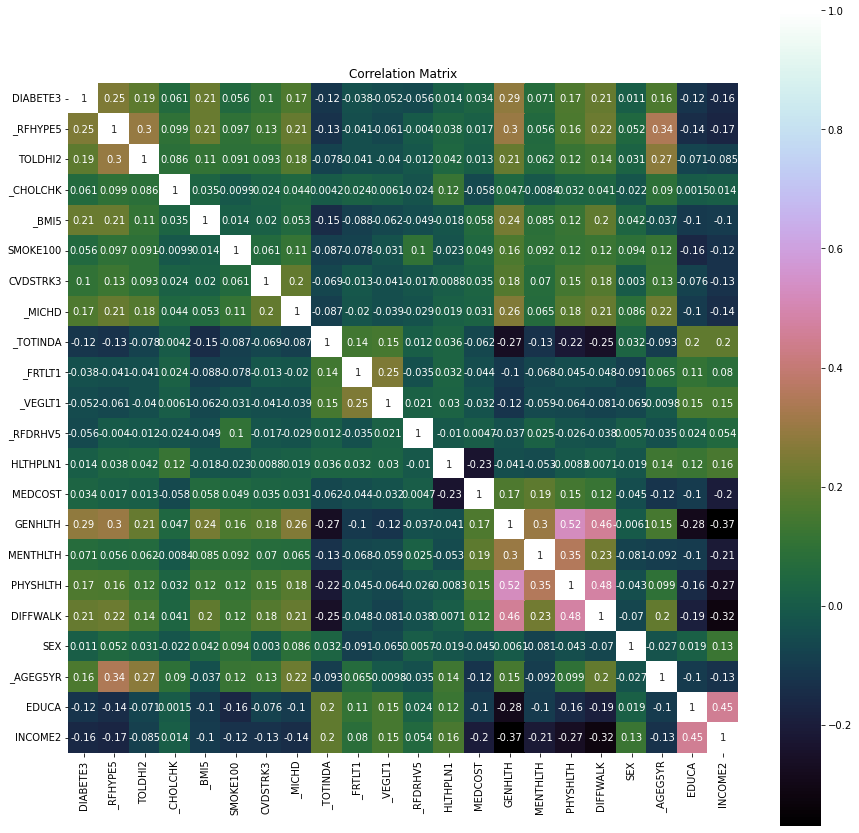

In [ ]:
# correlation
correlation = diabetes_df.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

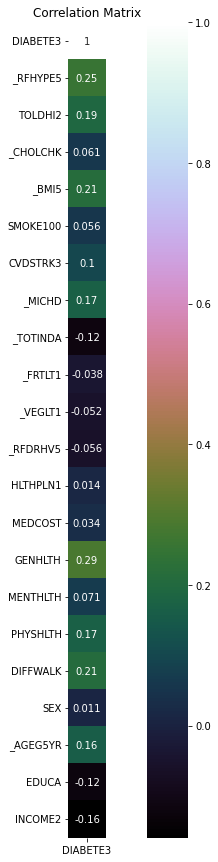

In [ ]:
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation[['DIABETE3']], vmax=1, square=True,annot=True,cmap='cubehelix')

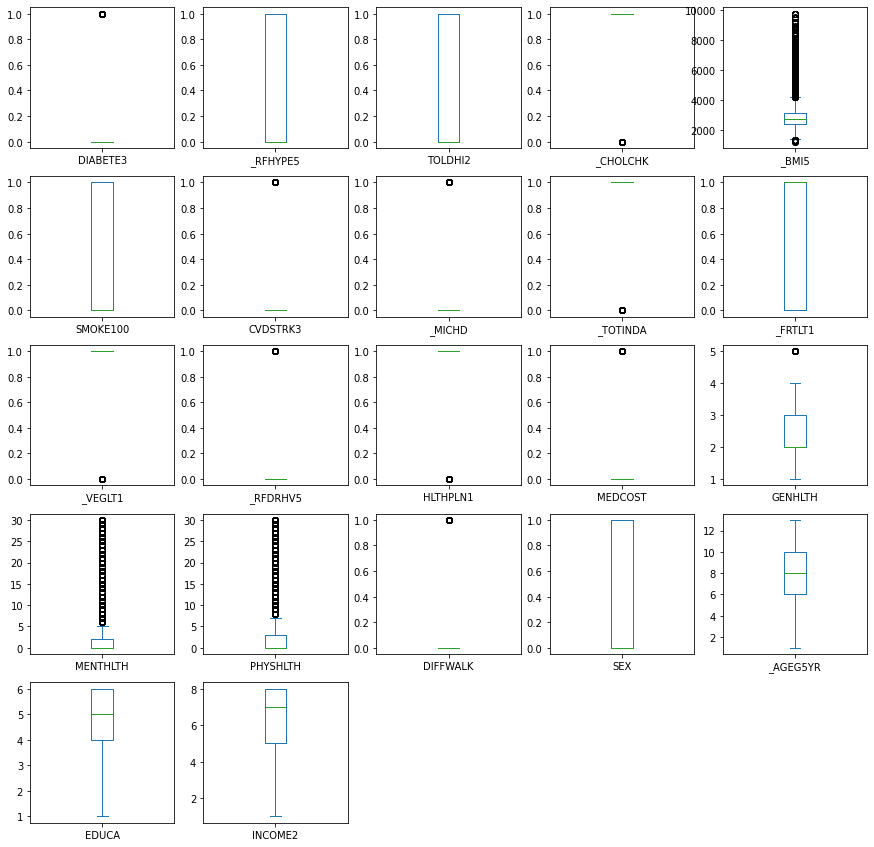

In [ ]:
#Box and Whisker Plots
diabetes_df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(15,15))
pyplot.show()

In [ ]:
diabetes_df.shape

(253680, 22)

# Other

In [ ]:
train_data, val_data = train_test_split(diabetes_df, test_size = 0.30, random_state=42) #70/30 split, 70% for training, 30% for testing/validating

In [ ]:
def tuning_full_logistic_model(train_data, val_data, reg):
    
    x_train =  train_data.drop(['DIABETE3'], axis = 1)
    y_train = train_data['DIABETE3']

    x_val = val_data.drop(['DIABETE3'], axis = 1)
    y_val = val_data['DIABETE3']

    # solver parameter prevents STOP: TOTAL NO. of ITERATIONS REACHED LIMIT. Increase the number of iterations (max_iter) WARNING
    # C: Regularization parameter. The strength of the regularization.
    log_reg_model = LogisticRegression(C=reg, solver = 'liblinear').fit(x_train, y_train);
    #log_reg_pred = log_reg_model.predict(x_val)
    log_reg_dec = log_reg_model.decision_function(x_val)

    # AUC
    log_reg_auc = metrics.roc_auc_score(y_val, log_reg_dec)
    print('Logistic Regression AUC = {:0.4f}'.format(log_reg_auc), '\n')

for c in [1,2,3,4,5,6,7,8,9,10]:
  print('C:', c)
  tuning_full_logistic_model(train_data, val_data, c)

C: 1
Logistic Regression AUC = 0.7949 

C: 2
Logistic Regression AUC = 0.7946 

C: 3
Logistic Regression AUC = 0.7946 

C: 4
Logistic Regression AUC = 0.7945 

C: 5
Logistic Regression AUC = 0.7984 

C: 6
Logistic Regression AUC = 0.7946 

C: 7
Logistic Regression AUC = 0.7831 

C: 8
Logistic Regression AUC = 0.7946 

C: 9
Logistic Regression AUC = 0.7946 

C: 10
Logistic Regression AUC = 0.7947 



In [ ]:

def singular_logistic_model(train_data, val_data, predictor):
    
    print('Feature', predictor)
    x_train =  train_data[predictor].array.reshape(-1, 1)
    y_train = train_data['DIABETE3']

    x_val = val_data[predictor].array.reshape(-1, 1)
    y_val = val_data['DIABETE3']

    log_reg_model = LogisticRegression(C = 5, solver = 'liblinear').fit(x_train, y_train);
    #log_reg_pred = log_reg_model.predict(x_val)
    log_reg_dec = log_reg_model.decision_function(x_val)

    # AUC
    log_reg_auc = metrics.roc_auc_score(y_val, log_reg_dec)
    print('Logistic Regression AUC = {:0.4f}'.format(log_reg_auc), '\n')

In [ ]:
for predictor in diabetes_df.columns:
    singular_logistic_model(train_data, val_data, predictor)

Feature DIABETE3
Logistic Regression AUC = 1.0000 

Feature _RFHYPE5
Logistic Regression AUC = 0.6767 

Feature TOLDHI2
Logistic Regression AUC = 0.6389 

Feature _CHOLCHK
Logistic Regression AUC = 0.5163 

Feature _BMI5
Logistic Regression AUC = 0.6811 

Feature SMOKE100
Logistic Regression AUC = 0.5372 

Feature CVDSTRK3
Logistic Regression AUC = 0.5273 

Feature _MICHD
Logistic Regression AUC = 0.5677 

Feature _TOTINDA
Logistic Regression AUC = 0.5691 

Feature _FRTLT1
Logistic Regression AUC = 0.5261 

Feature _VEGLT1
Logistic Regression AUC = 0.5276 

Feature _RFDRHV5
Logistic Regression AUC = 0.5186 

Feature HLTHPLN1
Logistic Regression AUC = 0.5053 

Feature MEDCOST
Logistic Regression AUC = 0.5121 

Feature GENHLTH
Logistic Regression AUC = 0.7190 

Feature MENTHLTH
Logistic Regression AUC = 0.5285 

Feature PHYSHLTH
Logistic Regression AUC = 0.6076 

Feature DIFFWALK
Logistic Regression AUC = 0.6082 

Feature SEX
Logistic Regression AUC = 0.5069 

Feature _AGEG5YR
Logistic R

In [ ]:
def multiple_logistic_model(train_data, val_data, exclude_predictor = ''):
    if (exclude_predictor == 'DIABETE3'):
       print('No Predictors Removed')
    else:
        print('Feature excluded:', exclude_predictor)
    x_train =  train_data.drop(['DIABETE3', exclude_predictor], axis = 1)
    y_train = train_data['DIABETE3']

    x_val = val_data.drop(['DIABETE3', exclude_predictor], axis = 1)
    y_val = val_data['DIABETE3']

    log_reg_model = LogisticRegression(C = 5, solver = 'liblinear').fit(x_train, y_train);
    log_reg_dec = log_reg_model.decision_function(x_val)

    # AUC
    log_reg_auc = metrics.roc_auc_score(y_val, log_reg_dec)
    print('Logistic Regression AUC = {:0.4f}'.format(log_reg_auc))
    
    log_reg_fpr, log_reg_tpr, log_reg_thresholds = metrics.roc_curve(y_val, log_reg_dec)
    
    _ = plt.plot([0, 1], [0, 1], 'k--')
    _ = plt.plot(log_reg_fpr, log_reg_tpr, label='Logistic Regression '+ "AUC = {:0.4f}".format(log_reg_auc))
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.title('Logistic Regression ROC Curve')
    _ = plt.legend()

    plt.show()

    return float(log_reg_auc)

No Predictors Removed
Logistic Regression AUC = 0.7984


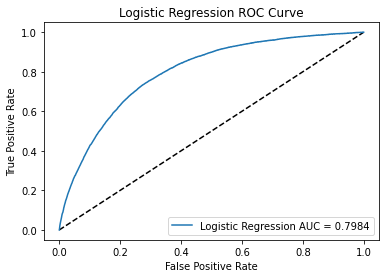

AUC Change =  0.0
-------------------------------------------------
Feature excluded: _RFHYPE5
Logistic Regression AUC = 0.7622


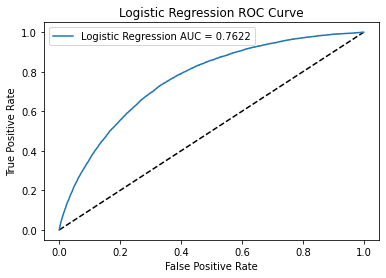

AUC Change =  -0.03613984754227373
-------------------------------------------------
Feature excluded: TOLDHI2
Logistic Regression AUC = 0.7893


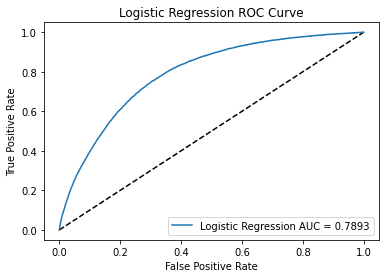

AUC Change =  -0.00907879412617929
-------------------------------------------------
Feature excluded: _CHOLCHK
Logistic Regression AUC = 0.7903


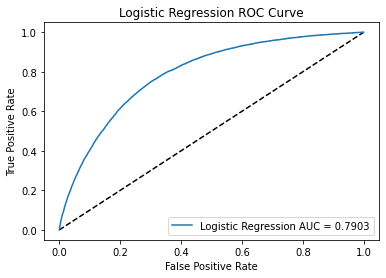

AUC Change =  -0.008043343143754322
-------------------------------------------------
Feature excluded: _BMI5
Logistic Regression AUC = 0.7885


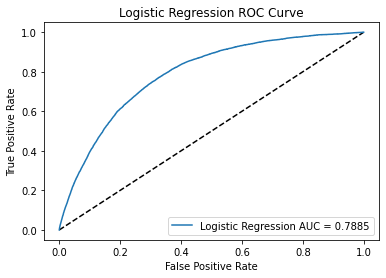

AUC Change =  -0.00983694324607387
-------------------------------------------------
Feature excluded: SMOKE100
Logistic Regression AUC = 0.7992


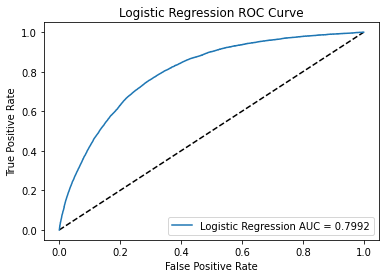

AUC Change =  0.0008692883182875866
-------------------------------------------------
Feature excluded: CVDSTRK3
Logistic Regression AUC = 0.7865


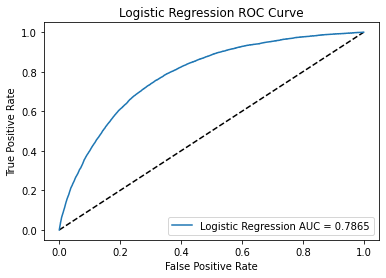

AUC Change =  -0.011817078802725423
-------------------------------------------------
Feature excluded: _MICHD
Logistic Regression AUC = 0.7910


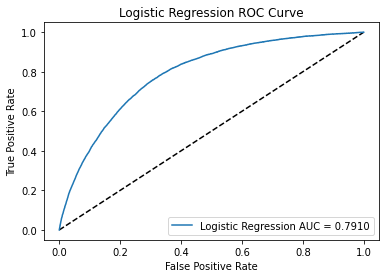

AUC Change =  -0.007304719509169111
-------------------------------------------------
Feature excluded: _TOTINDA
Logistic Regression AUC = 0.7903


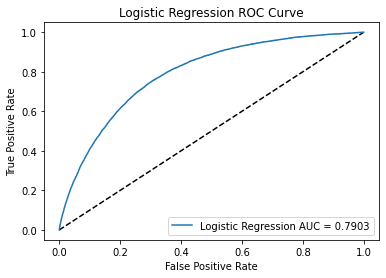

AUC Change =  -0.008024175039293646
-------------------------------------------------
Feature excluded: _FRTLT1
Logistic Regression AUC = 0.7864


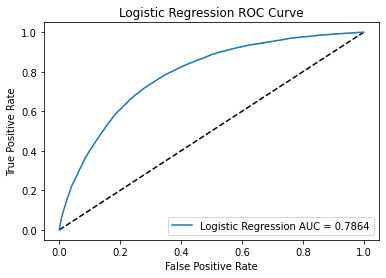

AUC Change =  -0.01195414789002125
-------------------------------------------------
Feature excluded: _VEGLT1
Logistic Regression AUC = 0.7862


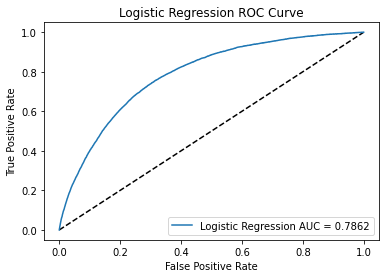

AUC Change =  -0.012149028013680008
-------------------------------------------------
Feature excluded: _RFDRHV5
Logistic Regression AUC = 0.7950


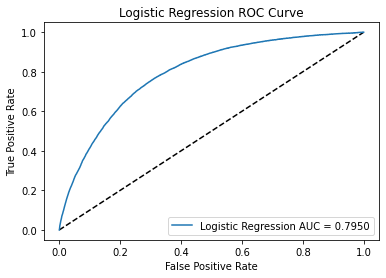

AUC Change =  -0.0033654360199086852
-------------------------------------------------
Feature excluded: HLTHPLN1
Logistic Regression AUC = 0.7901


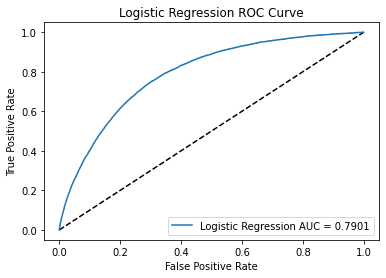

AUC Change =  -0.00820309515880735
-------------------------------------------------
Feature excluded: MEDCOST
Logistic Regression AUC = 0.7950


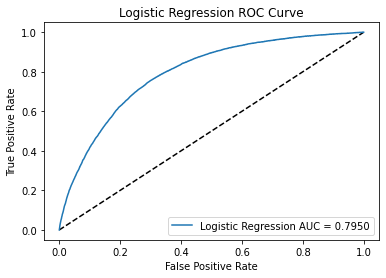

AUC Change =  -0.0033627164557432643
-------------------------------------------------
Feature excluded: GENHLTH
Logistic Regression AUC = 0.7740


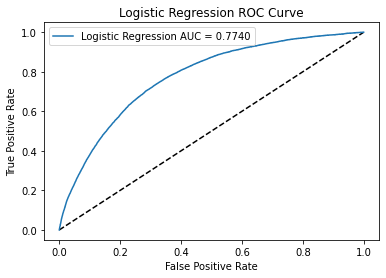

AUC Change =  -0.0243675100460069
-------------------------------------------------
Feature excluded: MENTHLTH
Logistic Regression AUC = 0.7884


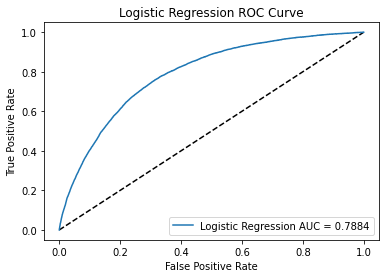

AUC Change =  -0.009970918733714362
-------------------------------------------------
Feature excluded: PHYSHLTH
Logistic Regression AUC = 0.7868


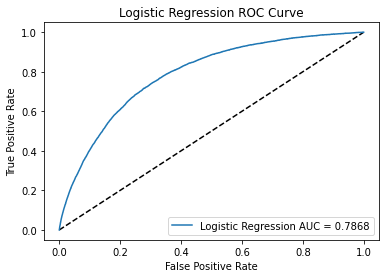

AUC Change =  -0.011526982011875408
-------------------------------------------------
Feature excluded: DIFFWALK
Logistic Regression AUC = 0.7799


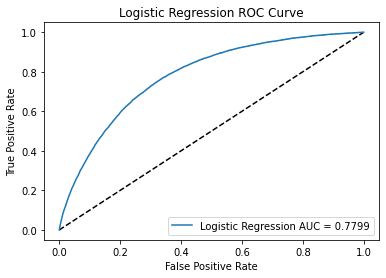

AUC Change =  -0.018498371362733468
-------------------------------------------------
Feature excluded: SEX
Logistic Regression AUC = 0.7867


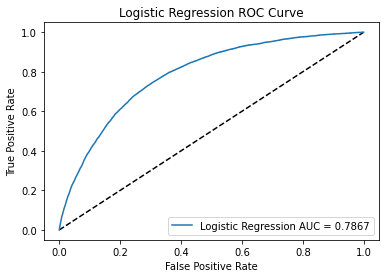

AUC Change =  -0.011650637867286595
-------------------------------------------------
Feature excluded: _AGEG5YR
Logistic Regression AUC = 0.7807


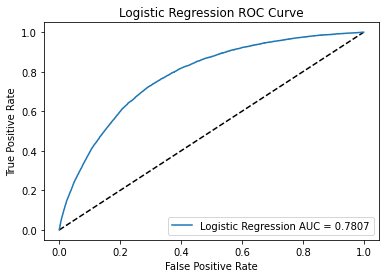

AUC Change =  -0.01760402960605112
-------------------------------------------------
Feature excluded: EDUCA
Logistic Regression AUC = 0.7912


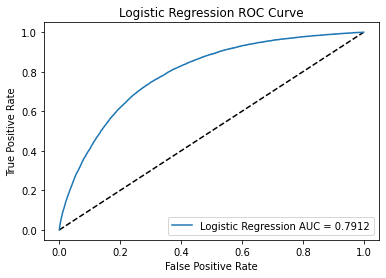

AUC Change =  -0.007155584828061778
-------------------------------------------------
Feature excluded: INCOME2
Logistic Regression AUC = 0.8003


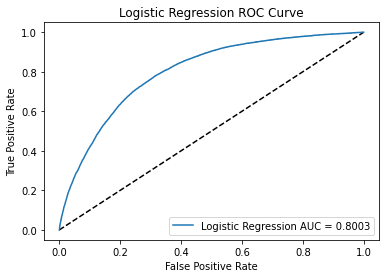

AUC Change =  0.0019295089162587598
-------------------------------------------------


In [ ]:
full_model_auc = 0
performance_dict = {}
for predictor in diabetes_df.columns:
    curr_auc = multiple_logistic_model(train_data, val_data, predictor)
    if (predictor == 'DIABETE3'):
        full_model_auc = curr_auc
    performance_dict[predictor] = (curr_auc - full_model_auc)
    print("AUC Change = ", (curr_auc - full_model_auc))
    print('-------------------------------------------------')

In [ ]:
import builtins

log_reg_best_predictor = builtins.min(performance_dict, key=performance_dict.get)
print(log_reg_best_predictor,"drops Logistic Regression model AUC performance the most by", performance_dict[log_reg_best_predictor])

_RFHYPE5 drops Logistic Regression model AUC performance the most by -0.03613984754227373


In [ ]:
#LinearSVC uses solver 'liblinear' and using DUAL = False prevents warning of 
# STOP: TOTAL NO. of ITERATIONS REACHED LIMIT. Increase the number of iterations (max_iter) WARNING
def tuning_full_svm_model(train_data, val_data, reg):

    x_train =  train_data.drop(['DIABETE3'], axis = 1)
    y_train = train_data['DIABETE3']

    x_val = val_data.drop(['DIABETE3'], axis = 1)
    y_val = val_data['DIABETE3']

    svm_model = LinearSVC(C = reg, dual = False).fit(x_train, y_train)
    #svm_pred = svm_model.predict(x_val)
    svm_dec = svm_model.decision_function(x_val)

    # AUC
    svm_auc = metrics.roc_auc_score(y_val, svm_dec)
    print('SVM AUC =', svm_auc)
    
for c in [1,2,3,4,5,6,7,8,9,10]:
  print('C:', c)
  tuning_full_svm_model(train_data, val_data, c)

C: 1
SVM AUC = 0.7665737294184768
C: 2
SVM AUC = 0.7665738321220992
C: 3
SVM AUC = 0.7665728009222141
C: 4
SVM AUC = 0.766571160440028
C: 5
SVM AUC = 0.7665738002007032
C: 6
SVM AUC = 0.7665732145124777
C: 7
SVM AUC = 0.7665733269313076
C: 8
SVM AUC = 0.7665735753630429
C: 9
SVM AUC = 0.7665735684236092
C: 10
SVM AUC = 0.7665744067072304


In [ ]:
def singular_svm_func(train_data, val_data, predictor):
    
    print('Feature', predictor)
    x_train =  train_data[predictor].array.reshape(-1, 1)
    y_train = train_data['DIABETE3']

    x_val = val_data[predictor].array.reshape(-1, 1)
    y_val = val_data['DIABETE3']

    svm_model = LinearSVC(C = 10, dual = False).fit(x_train, y_train)
    svm_dec = svm_model.decision_function(x_val)

    # AUC
    svm_auc = metrics.roc_auc_score(y_val, svm_dec)
    print('SVM AUC = {:0.4f}'.format(svm_auc),'\n')

def multiple_svm_func(train_data, val_data, exclude_predictor = ''):
    
    print('Feature excluded:', exclude_predictor)
    x_train =  train_data.drop(['DIABETE3', exclude_predictor], axis = 1)
    y_train = train_data['DIABETE3']

    x_val = val_data.drop(['DIABETE3', exclude_predictor], axis = 1)
    y_val = val_data['DIABETE3']

    svm_model = LinearSVC(C = 10, dual = False).fit(x_train, y_train)
    svm_dec = svm_model.decision_function(x_val)

    # AUC
    svm_auc = metrics.roc_auc_score(y_val, svm_dec)
    print('SVM AUC = {:0.4f}'.format(svm_auc))
    
    svm_fpr, svm_tpr, svm_thresholds = metrics.roc_curve(y_val, svm_dec)

    _ = plt.plot([0, 1], [0, 1], 'k--')
    _ = plt.plot(svm_fpr, svm_tpr, label='SVM ' + "AUC = {:0.3f}".format(svm_auc))
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.title('SVM ROC Curve')
    _ = plt.legend()

    plt.show()
    
    return float(svm_auc)

In [ ]:
for predictor in diabetes_df.columns:
    singular_svm_func(train_data, val_data, predictor)

Feature DIABETE3
SVM AUC = 1.0000 

Feature _RFHYPE5
SVM AUC = 0.6767 

Feature TOLDHI2
SVM AUC = 0.6389 

Feature _CHOLCHK
SVM AUC = 0.5163 

Feature _BMI5
SVM AUC = 0.6811 

Feature SMOKE100
SVM AUC = 0.5372 

Feature CVDSTRK3
SVM AUC = 0.5273 

Feature _MICHD
SVM AUC = 0.5677 

Feature _TOTINDA
SVM AUC = 0.5691 

Feature _FRTLT1
SVM AUC = 0.5261 

Feature _VEGLT1
SVM AUC = 0.5276 

Feature _RFDRHV5
SVM AUC = 0.5186 

Feature HLTHPLN1
SVM AUC = 0.5053 

Feature MEDCOST
SVM AUC = 0.5121 

Feature GENHLTH
SVM AUC = 0.7190 

Feature MENTHLTH
SVM AUC = 0.5285 

Feature PHYSHLTH
SVM AUC = 0.6076 

Feature DIFFWALK
SVM AUC = 0.6082 

Feature SEX
SVM AUC = 0.5069 

Feature _AGEG5YR
SVM AUC = 0.6341 

Feature EDUCA
SVM AUC = 0.5862 

Feature INCOME2
SVM AUC = 0.6259 



Feature excluded: DIABETE3
SVM AUC = 0.7666


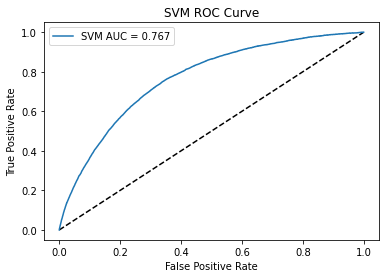

AUC Change = 0.0
-------------------------------------------------
Feature excluded: _RFHYPE5
SVM AUC = 0.7586


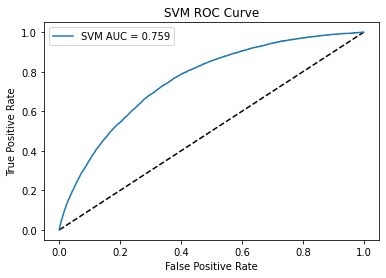

AUC Change = -0.00802054224562021
-------------------------------------------------
Feature excluded: TOLDHI2
SVM AUC = 0.7780


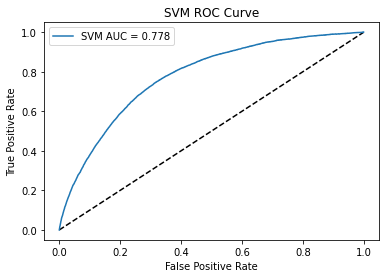

AUC Change = 0.01144625280094469
-------------------------------------------------
Feature excluded: _CHOLCHK
SVM AUC = 0.7653


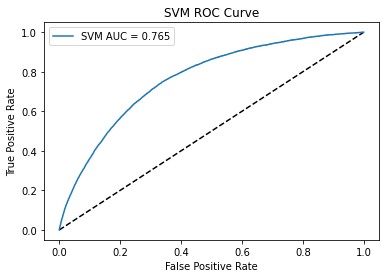

AUC Change = -0.0012747788744860156
-------------------------------------------------
Feature excluded: _BMI5
SVM AUC = 0.7876


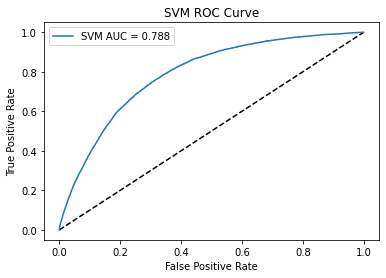

AUC Change = 0.021022189363293142
-------------------------------------------------
Feature excluded: SMOKE100
SVM AUC = 0.7657


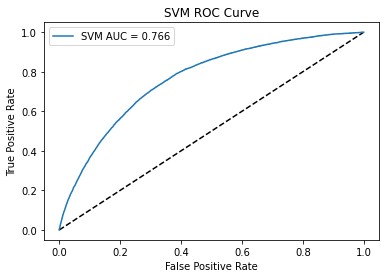

AUC Change = -0.0008782235334432453
-------------------------------------------------
Feature excluded: CVDSTRK3
SVM AUC = 0.7666


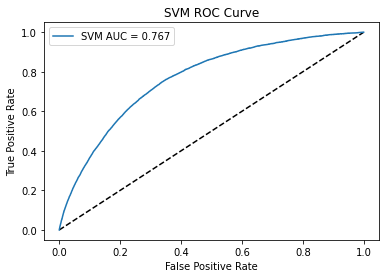

AUC Change = 2.0801647212964625e-05
-------------------------------------------------
Feature excluded: _MICHD
SVM AUC = 0.7662


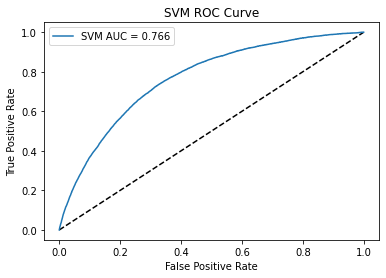

AUC Change = -0.0003677601598610636
-------------------------------------------------
Feature excluded: _TOTINDA
SVM AUC = 0.7675


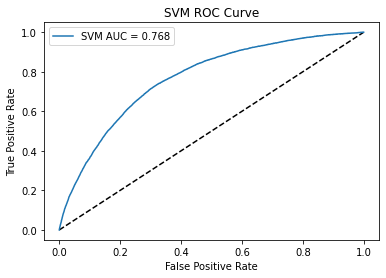

AUC Change = 0.0009635813468199528
-------------------------------------------------
Feature excluded: _FRTLT1
SVM AUC = 0.7669


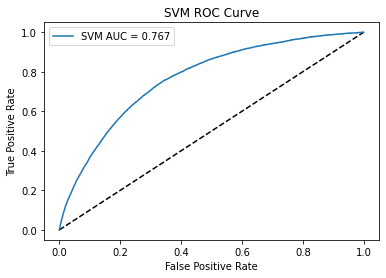

AUC Change = 0.000318774001654476
-------------------------------------------------
Feature excluded: _VEGLT1
SVM AUC = 0.7672


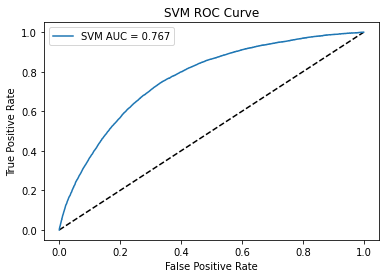

AUC Change = 0.0005887762736113133
-------------------------------------------------
Feature excluded: _RFDRHV5
SVM AUC = 0.7654


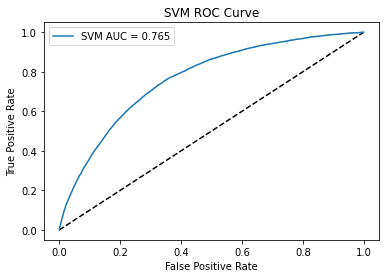

AUC Change = -0.0011267968333580347
-------------------------------------------------
Feature excluded: HLTHPLN1
SVM AUC = 0.7657


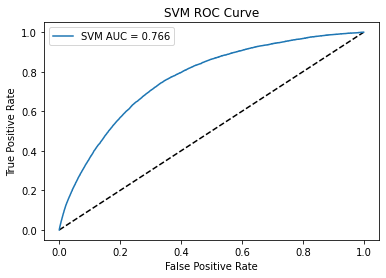

AUC Change = -0.0008371136327716133
-------------------------------------------------
Feature excluded: MEDCOST
SVM AUC = 0.7661


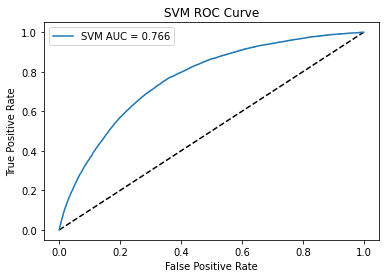

AUC Change = -0.00045159615537215814
-------------------------------------------------
Feature excluded: GENHLTH
SVM AUC = 0.7623


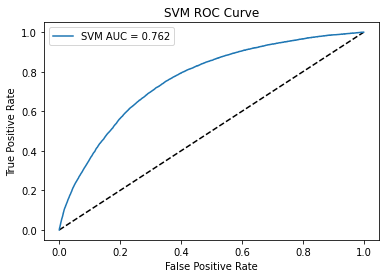

AUC Change = -0.004274477579530478
-------------------------------------------------
Feature excluded: MENTHLTH
SVM AUC = 0.7905


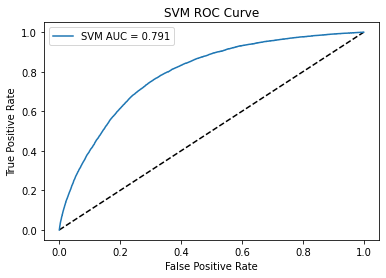

AUC Change = 0.023939603730258385
-------------------------------------------------
Feature excluded: PHYSHLTH
SVM AUC = 0.7732


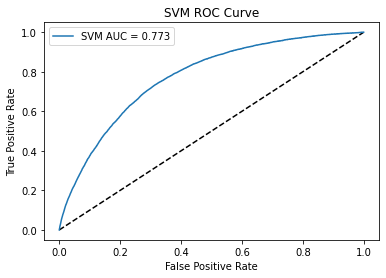

AUC Change = 0.00658704186202308
-------------------------------------------------
Feature excluded: DIFFWALK
SVM AUC = 0.7675


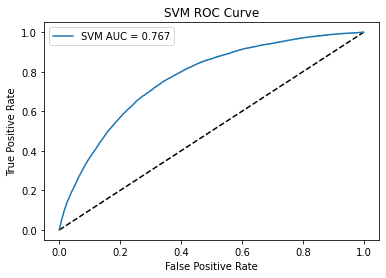

AUC Change = 0.0008984623925629709
-------------------------------------------------
Feature excluded: SEX
SVM AUC = 0.7670


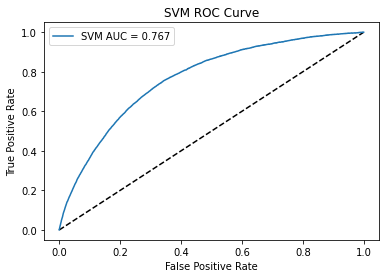

AUC Change = 0.0004002179742823575
-------------------------------------------------
Feature excluded: _AGEG5YR
SVM AUC = 0.7621


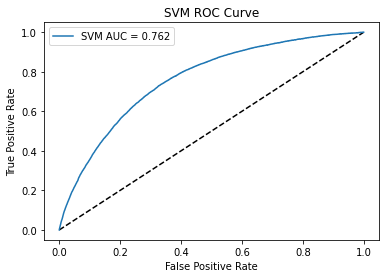

AUC Change = -0.004483107497620709
-------------------------------------------------
Feature excluded: EDUCA
SVM AUC = 0.7669


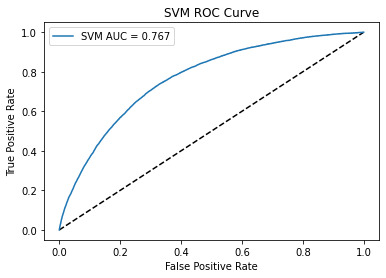

AUC Change = 0.000341762958448788
-------------------------------------------------
Feature excluded: INCOME2
SVM AUC = 0.7658


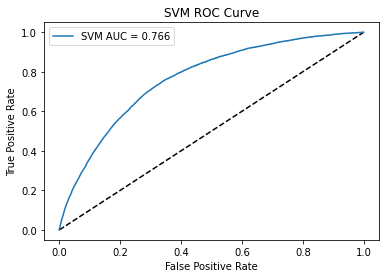

AUC Change = -0.0007440023898410697
-------------------------------------------------


In [ ]:
full_model_auc = 0
performance_dict = {}
for predictor in diabetes_df.columns:
    curr_auc = multiple_svm_func(train_data, val_data, predictor)
    if (predictor == 'DIABETE3'):
        full_model_auc = curr_auc
    performance_dict[predictor] = (curr_auc - full_model_auc)
    print("AUC Change =", curr_auc - full_model_auc)
    print('-------------------------------------------------')

In [ ]:
svm_best_predictor = min(performance_dict, key=performance_dict.get)
print(svm_best_predictor,"drops SVM model AUC performance the most by", performance_dict[svm_best_predictor])

_RFHYPE5 drops SVM model AUC performance the most by -0.00802054224562021


In [ ]:
def tuning_full_tree_model(train_data, val_data, crit):

    x_train =  train_data.drop(['DIABETE3'], axis = 1)
    y_train = train_data['DIABETE3']

    x_val = val_data.drop(['DIABETE3'], axis = 1)
    y_val = val_data['DIABETE3']

    decision_tree = tree.DecisionTreeClassifier(criterion=crit)
    
    # making use of Calibrated ClassifierCV to get probability predictions
    calibrated_decision_tree = CalibratedClassifierCV(base_estimator=decision_tree).fit(x_train,y_train)
    decision_tree_pred = calibrated_decision_tree.predict_proba(x_val)

    # AUC
    decision_auc = metrics.roc_auc_score(y_val, decision_tree_pred[:,1])
    print('Decision Tree AUC = {:0.4f}'.format(decision_auc))
    
for crit in ["gini", "entropy"]:
  print('Criterion:', crit)
  tuning_full_tree_model(train_data, val_data, crit)

Criterion: gini
Decision Tree AUC = 0.6960
Criterion: entropy
Decision Tree AUC = 0.6972


In [ ]:
def singular_tree_func(train_data, val_data, predictor):
    
    print('Feature', predictor)
    x_train =  train_data[predictor].array.reshape(-1, 1)
    y_train = train_data['DIABETE3']

    x_val = val_data[predictor].array.reshape(-1, 1)
    y_val = val_data['DIABETE3']

    decision_tree = tree.DecisionTreeClassifier(criterion="entropy")

    # making use of Calibrated ClassifierCV to get probability predictions
    calibrated_decision_tree = CalibratedClassifierCV(base_estimator=decision_tree).fit(x_train,y_train)
    decision_tree_pred = calibrated_decision_tree.predict_proba(x_val)

    # AUC
    decision_auc = metrics.roc_auc_score(y_val, decision_tree_pred[:,1])
    print('Decision Tree AUC = {:0.4f}\n'.format(decision_auc))

def multiple_feature_decision_tree(train_data, val_data, exclude_predictor = ''):
    if (exclude_predictor == 'DIABETE3'):
       print('No Predictors Removed')
    else:
        print('Feature excluded:', exclude_predictor)
    
    x_train =  train_data.drop(['DIABETE3', exclude_predictor], axis = 1)
    y_train = train_data['DIABETE3']

    x_val = val_data.drop(['DIABETE3', exclude_predictor], axis = 1)
    y_val = val_data['DIABETE3']

    decision_tree = tree.DecisionTreeClassifier(criterion="entropy")

    # making use of Calibrated ClassifierCV to get probability predictions
    calibrated_decision_tree = CalibratedClassifierCV(base_estimator=decision_tree).fit(x_train,y_train)
    decision_tree_pred = calibrated_decision_tree.predict_proba(x_val)

    # AUC
    decision_auc = metrics.roc_auc_score(y_val, decision_tree_pred[:,1])
    print('Decision Tree AUC = {:0.4f}'.format(decision_auc))

    decision_fpr, decision_tpr, decision_thresholds = metrics.roc_curve(y_val, decision_tree_pred[:,1])

    _ = plt.plot([0, 1], [0, 1], 'k--')
    _ = plt.plot(decision_fpr, decision_tpr, label='Decision Tree ' + "AUC = {:0.3f}".format(decision_auc))
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.title('Decision Tree ROC Curve')
    _ = plt.legend()

    plt.show()
    
    return float(decision_auc)

In [ ]:
for predictor in diabetes_df.columns:
    singular_tree_func(train_data, val_data, predictor)

Feature DIABETE3
Decision Tree AUC = 1.0000

Feature _RFHYPE5
Decision Tree AUC = 0.6767

Feature TOLDHI2
Decision Tree AUC = 0.6389

Feature _CHOLCHK
Decision Tree AUC = 0.5163

Feature _BMI5
Decision Tree AUC = 0.6724

Feature SMOKE100
Decision Tree AUC = 0.5372

Feature CVDSTRK3
Decision Tree AUC = 0.5273

Feature _MICHD
Decision Tree AUC = 0.5677

Feature _TOTINDA
Decision Tree AUC = 0.5691

Feature _FRTLT1
Decision Tree AUC = 0.5261

Feature _VEGLT1
Decision Tree AUC = 0.5276

Feature _RFDRHV5
Decision Tree AUC = 0.5186

Feature HLTHPLN1
Decision Tree AUC = 0.5053

Feature MEDCOST
Decision Tree AUC = 0.5121

Feature GENHLTH
Decision Tree AUC = 0.7190

Feature MENTHLTH
Decision Tree AUC = 0.5403

Feature PHYSHLTH
Decision Tree AUC = 0.6074

Feature DIFFWALK
Decision Tree AUC = 0.6082

Feature SEX
Decision Tree AUC = 0.5069

Feature _AGEG5YR
Decision Tree AUC = 0.6395

Feature EDUCA
Decision Tree AUC = 0.5862

Feature INCOME2
Decision Tree AUC = 0.6263



No Predictors Removed
Decision Tree AUC = 0.6991


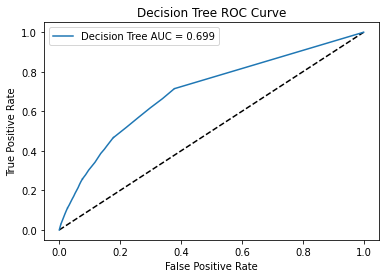

AUC Change = 0.0
-------------------------------------------------
Feature excluded: _RFHYPE5
Decision Tree AUC = 0.6889


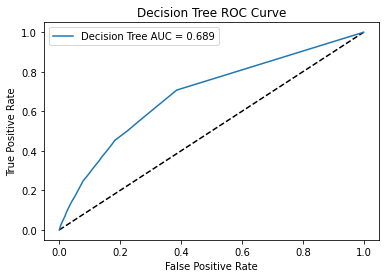

AUC Change = -0.010179303689786035
-------------------------------------------------
Feature excluded: TOLDHI2
Decision Tree AUC = 0.6923


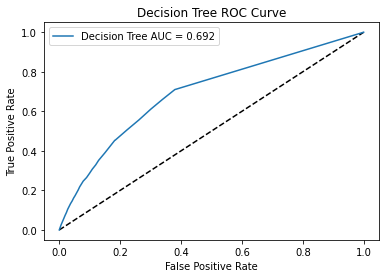

AUC Change = -0.0067972289890918525
-------------------------------------------------
Feature excluded: _CHOLCHK
Decision Tree AUC = 0.6950


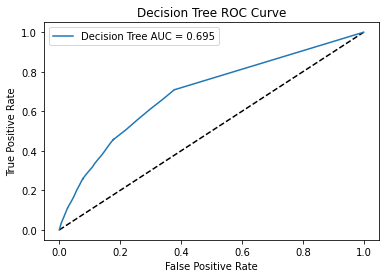

AUC Change = -0.004114327934912176
-------------------------------------------------
Feature excluded: _BMI5
Decision Tree AUC = 0.6708


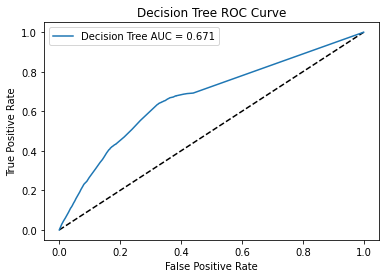

AUC Change = -0.02831270940271091
-------------------------------------------------
Feature excluded: SMOKE100
Decision Tree AUC = 0.6971


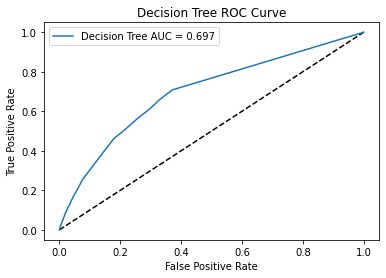

AUC Change = -0.0020628924701830975
-------------------------------------------------
Feature excluded: CVDSTRK3
Decision Tree AUC = 0.6972


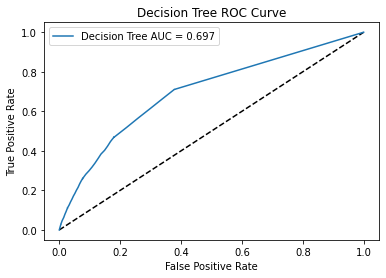

AUC Change = -0.0019490531380397247
-------------------------------------------------
Feature excluded: _MICHD
Decision Tree AUC = 0.6933


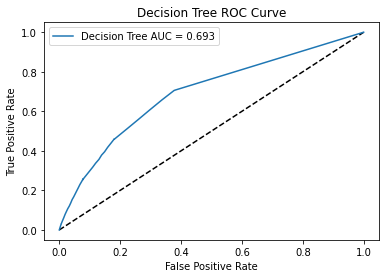

AUC Change = -0.005814362955320895
-------------------------------------------------
Feature excluded: _TOTINDA
Decision Tree AUC = 0.6967


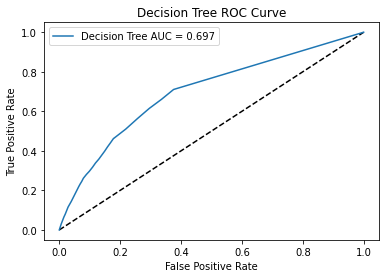

AUC Change = -0.0024207056454182974
-------------------------------------------------
Feature excluded: _FRTLT1
Decision Tree AUC = 0.6968


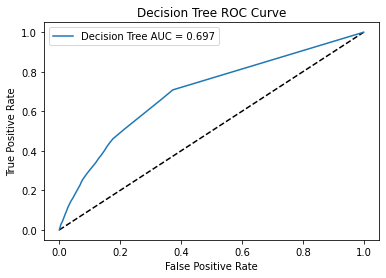

AUC Change = -0.0023235639792485996
-------------------------------------------------
Feature excluded: _VEGLT1
Decision Tree AUC = 0.6950


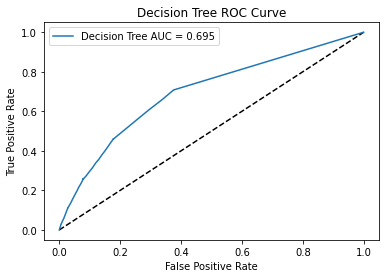

AUC Change = -0.004161273205594007
-------------------------------------------------
Feature excluded: _RFDRHV5
Decision Tree AUC = 0.6951


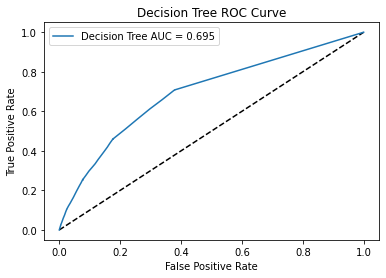

AUC Change = -0.003988439663598964
-------------------------------------------------
Feature excluded: HLTHPLN1
Decision Tree AUC = 0.6977


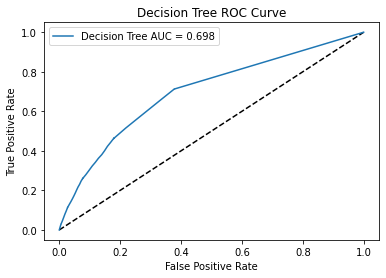

AUC Change = -0.0013951905445250823
-------------------------------------------------
Feature excluded: MEDCOST
Decision Tree AUC = 0.6974


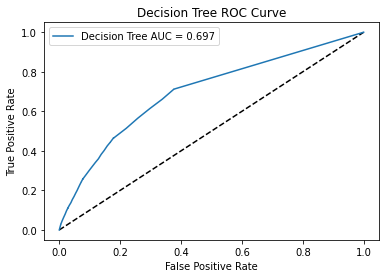

AUC Change = -0.0017261980742925287
-------------------------------------------------
Feature excluded: GENHLTH
Decision Tree AUC = 0.6778


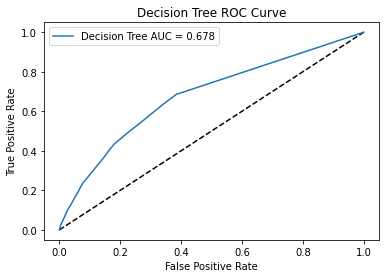

AUC Change = -0.021288238933671155
-------------------------------------------------
Feature excluded: MENTHLTH
Decision Tree AUC = 0.6950


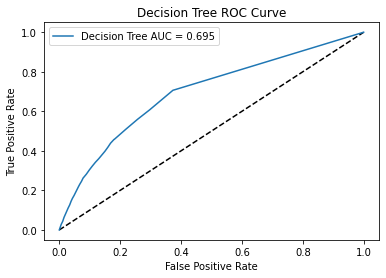

AUC Change = -0.004124479632839795
-------------------------------------------------
Feature excluded: PHYSHLTH
Decision Tree AUC = 0.6961


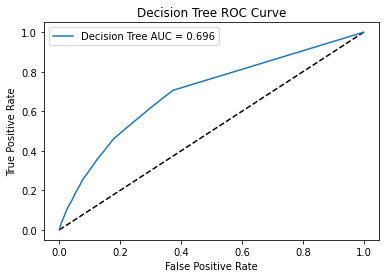

AUC Change = -0.0030597907333472785
-------------------------------------------------
Feature excluded: DIFFWALK
Decision Tree AUC = 0.6964


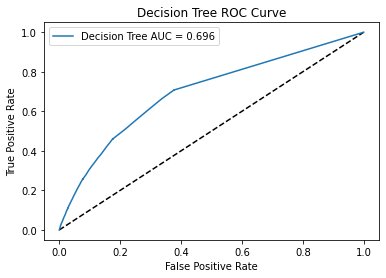

AUC Change = -0.0027365664726998196
-------------------------------------------------
Feature excluded: SEX
Decision Tree AUC = 0.6967


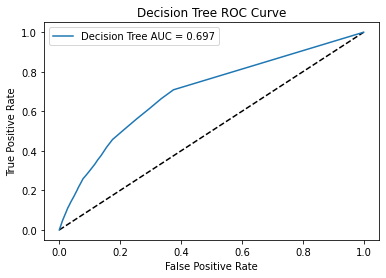

AUC Change = -0.0023825477799493955
-------------------------------------------------
Feature excluded: _AGEG5YR
Decision Tree AUC = 0.6835


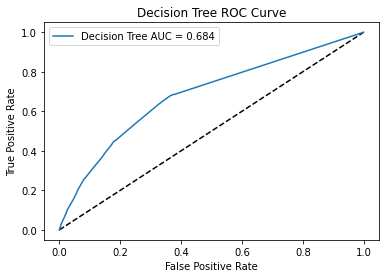

AUC Change = -0.015578118767282323
-------------------------------------------------
Feature excluded: EDUCA
Decision Tree AUC = 0.6970


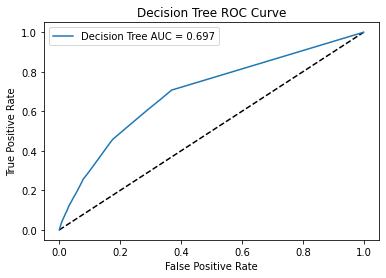

AUC Change = -0.002127332053856401
-------------------------------------------------
Feature excluded: INCOME2
Decision Tree AUC = 0.6934


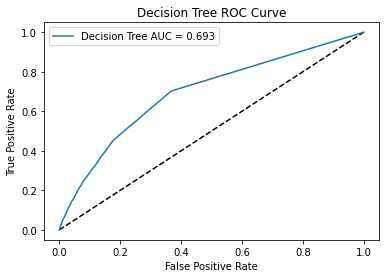

AUC Change = -0.0056957208409395
-------------------------------------------------


In [ ]:
full_model_auc = 0
performance_dict = {}
for predictor in diabetes_df.columns:
    curr_auc = multiple_feature_decision_tree(train_data, val_data, predictor)
    if (predictor == 'DIABETE3'):
        full_model_auc = curr_auc
    performance_dict[predictor] = (curr_auc - full_model_auc)
    print("AUC Change =", curr_auc - full_model_auc)
    print('-------------------------------------------------')

In [ ]:
decision_tree_best_predictor = min(performance_dict, key=performance_dict.get)
print(decision_tree_best_predictor,"drops Decision Tree model AUC performance the most by", performance_dict[decision_tree_best_predictor])

_BMI5 drops Decision Tree model AUC performance the most by -0.02831270940271091
